# Heart Disease Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#import dataset
heart_df = pd.read_csv('heart_dataset.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.shape

(1025, 14)

# Checking null values

In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_df.notnull().sum()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [8]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis(EDA)

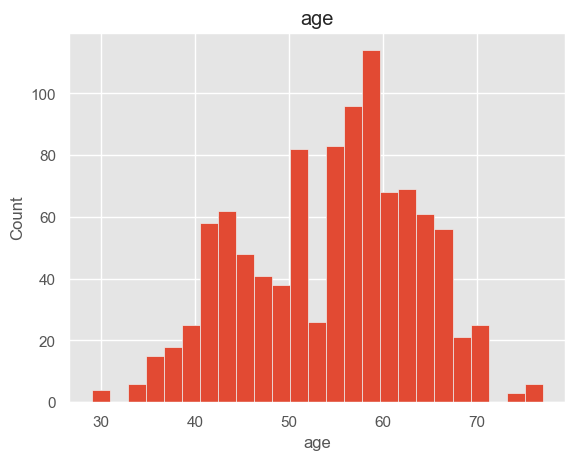

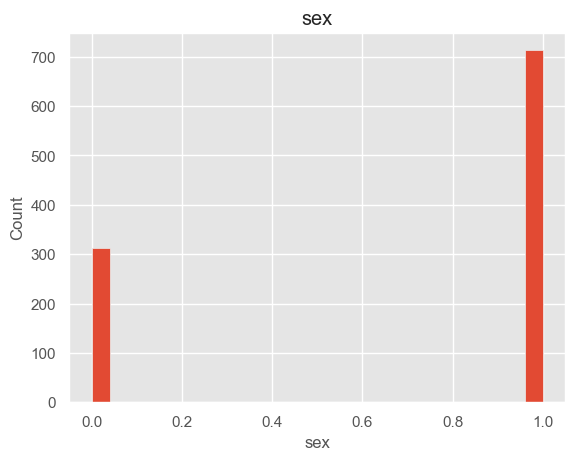

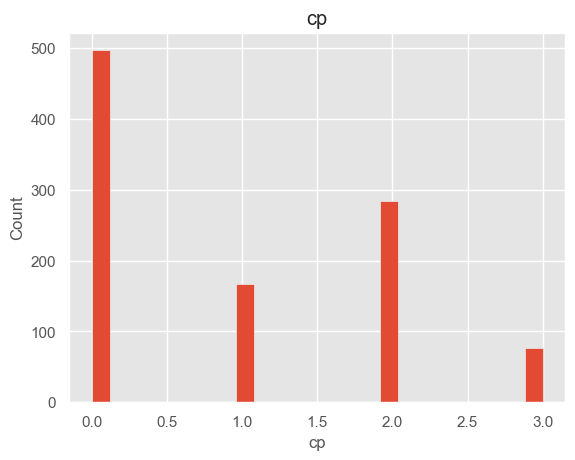

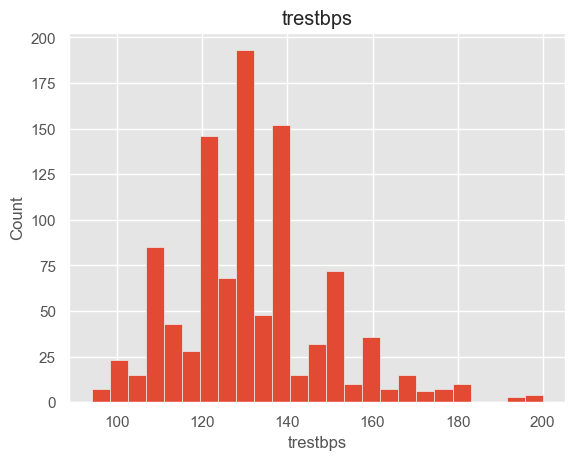

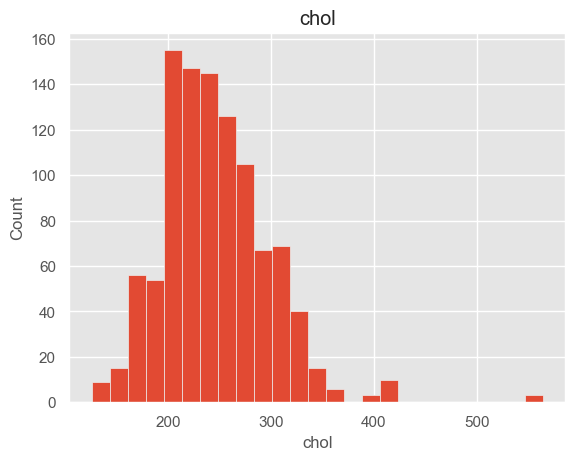

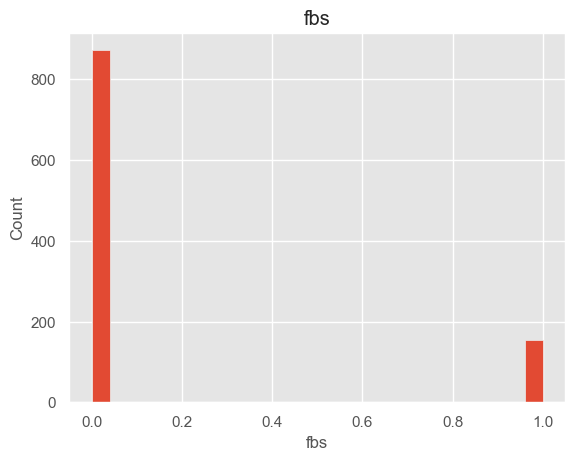

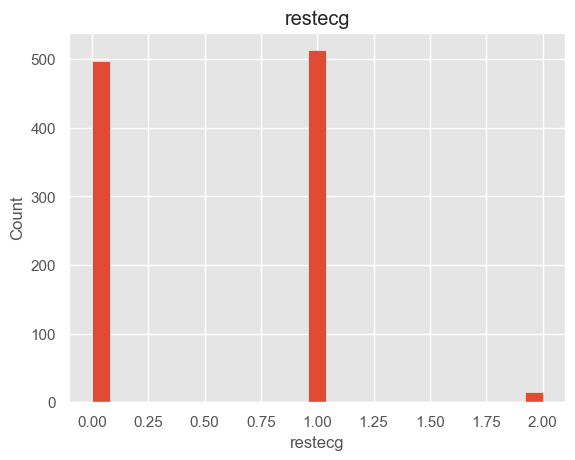

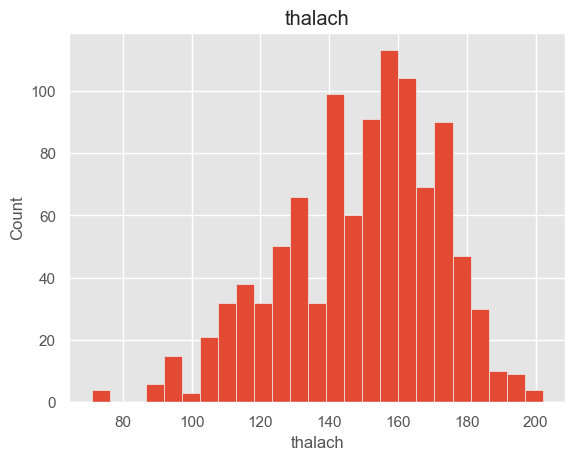

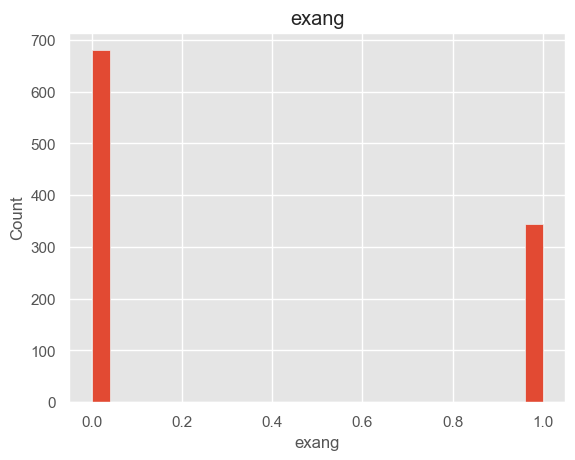

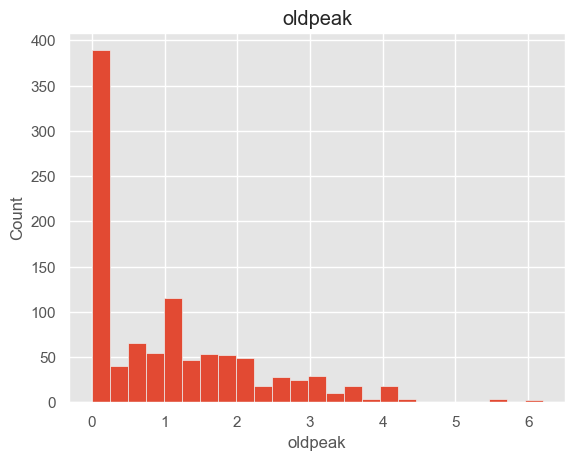

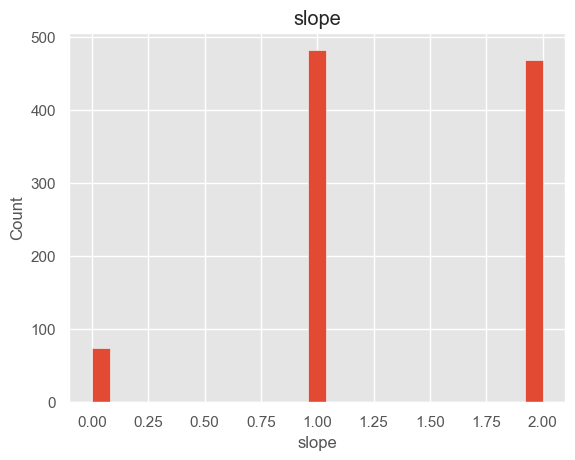

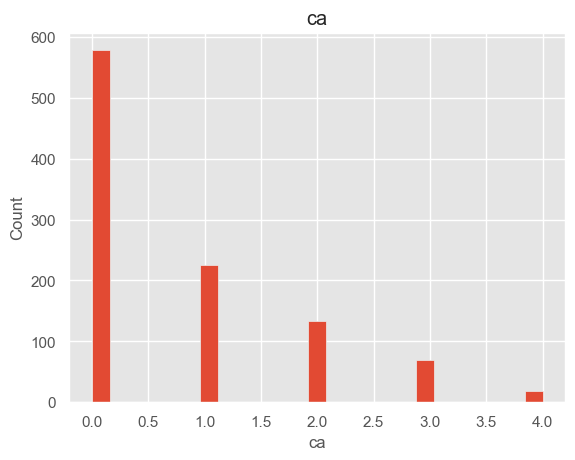

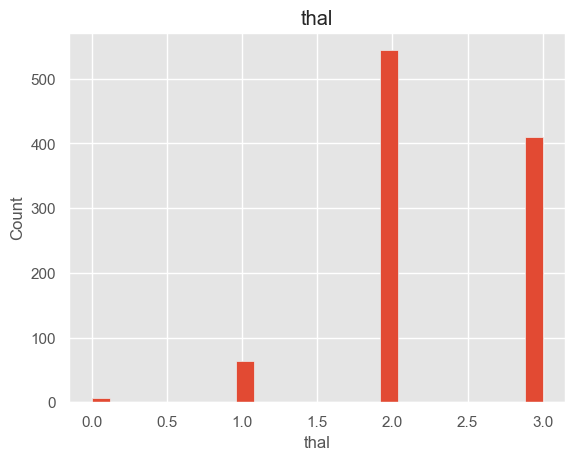

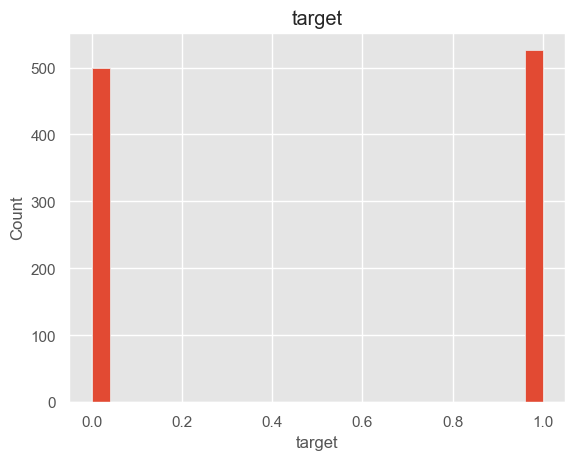

In [9]:
#plotting the hist plot of all attributes
for feature in heart_df:
    dataset = heart_df.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

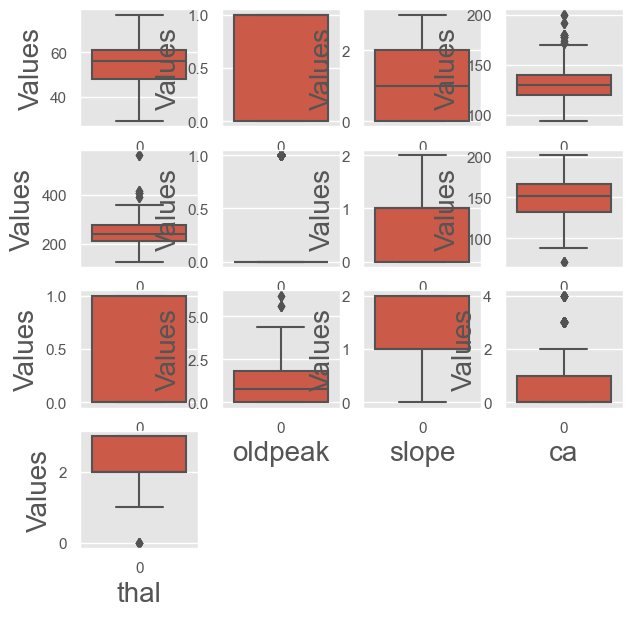

In [10]:
#Plotting the box plot.
plt.figure(figsize=(7,7))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
#Transforming ouliers to a paricular range
columns=[]
for i in heart_df:
    columns.append(i)
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

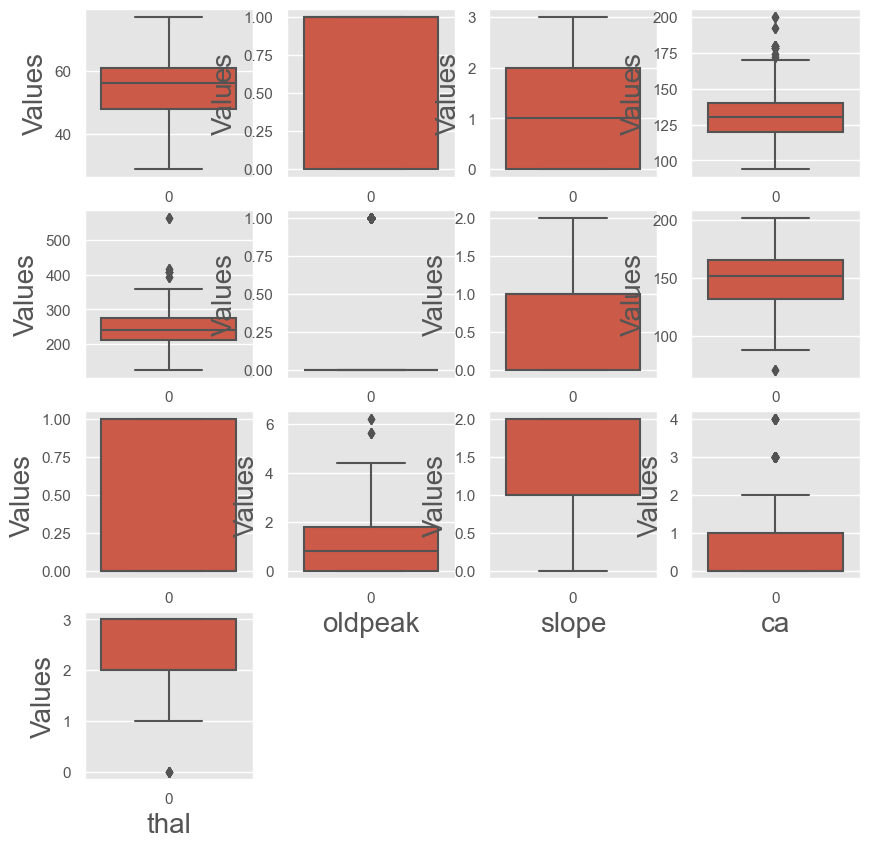

In [12]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

# Analysing the column Age

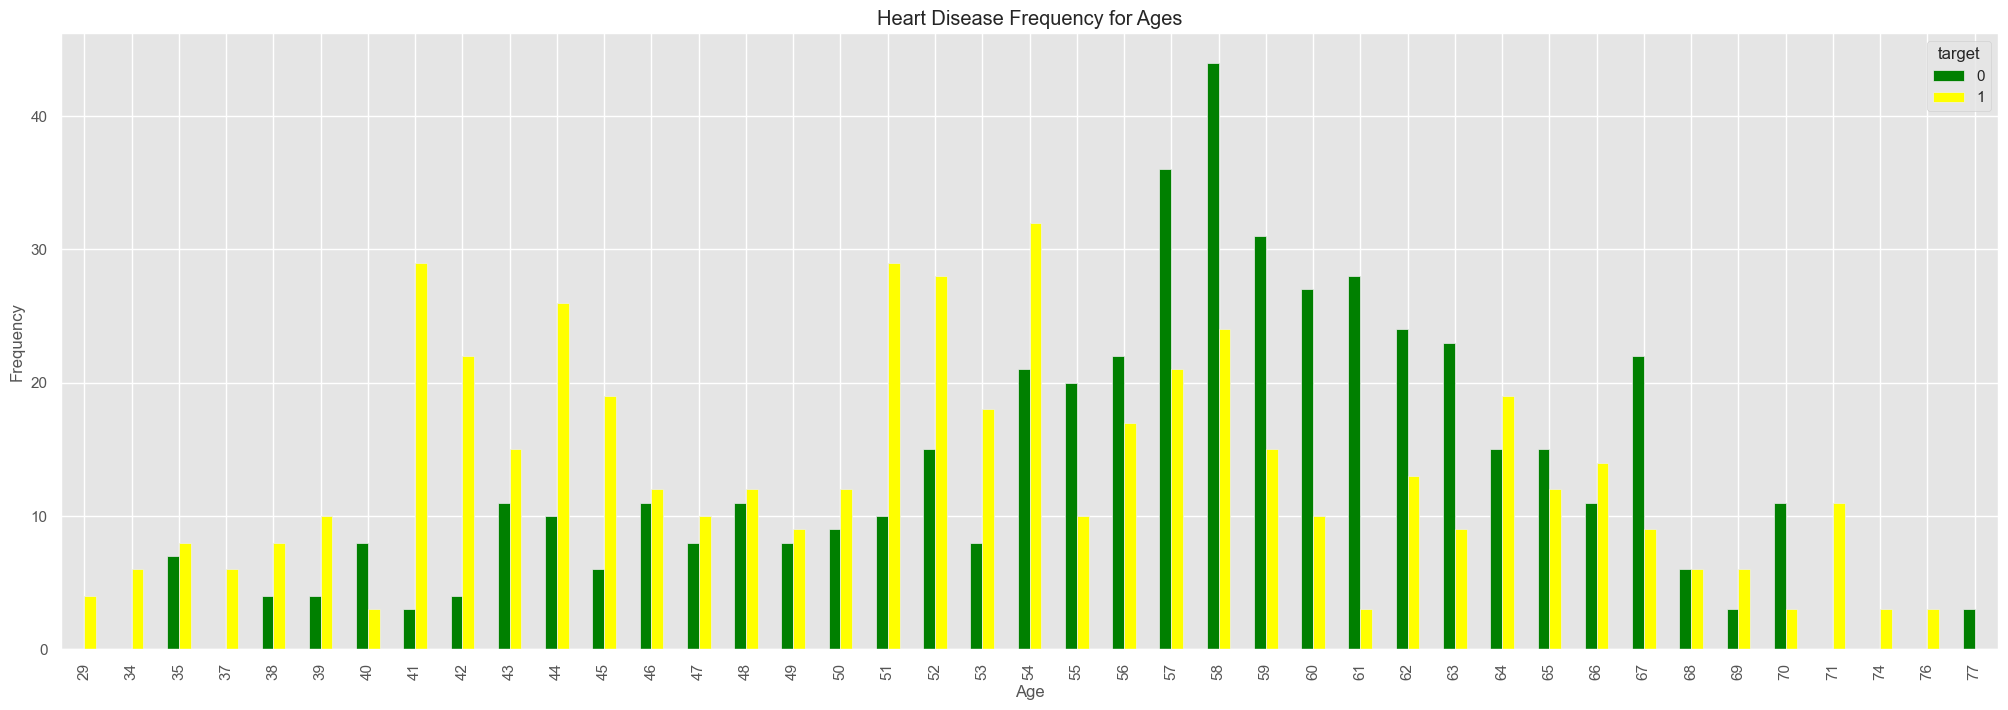

In [13]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(25,8),color=['green','yellow' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age'>

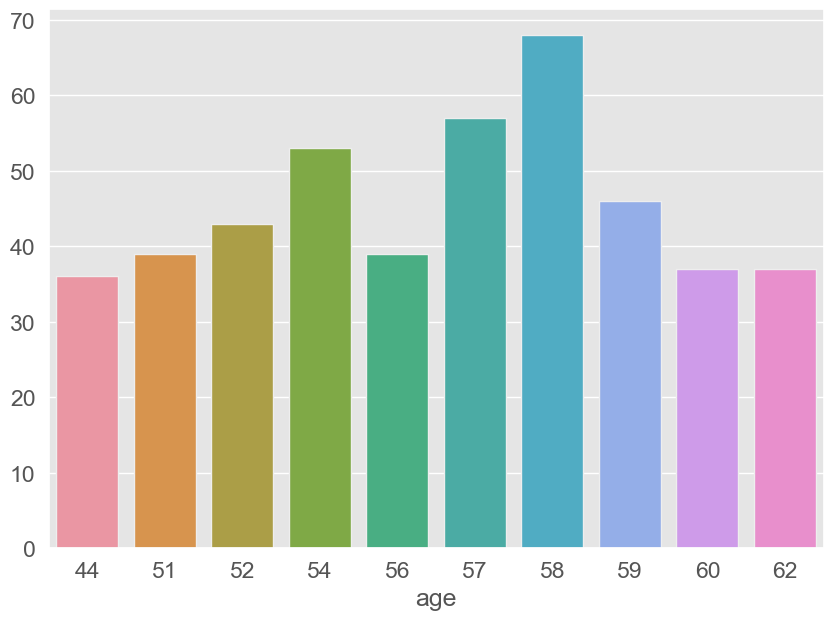

In [14]:
plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart_df.age.value_counts()[:10].index,y=heart_df.age.value_counts()[:10].values)

In [15]:
minAge=min(heart_df.age)
maxAge=max(heart_df.age)
meanAge=heart_df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


<Axes: >

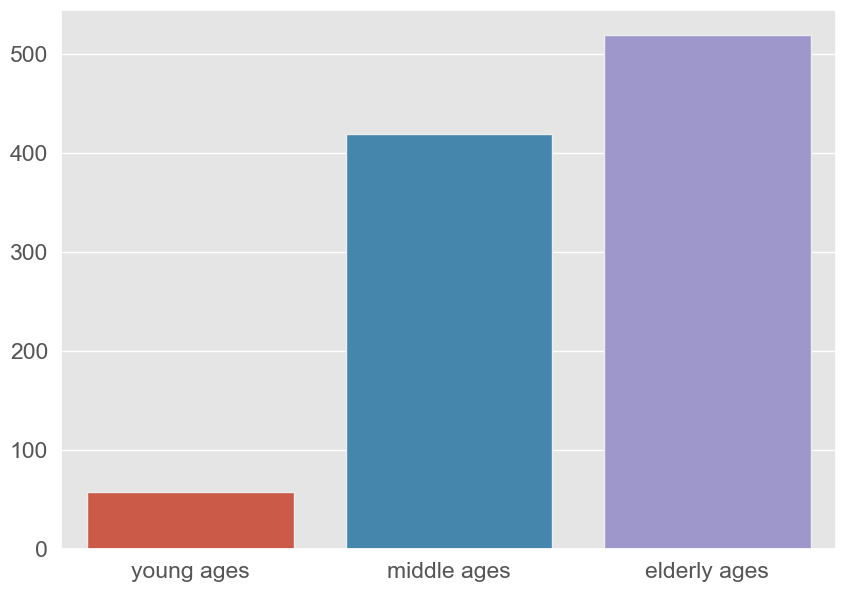

In [16]:
Young = heart_df[(heart_df.age>=29)&(heart_df.age<40)]
Middle = heart_df[(heart_df.age>=40)&(heart_df.age<55)]
Elder = heart_df[(heart_df.age>55)]

plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])

([<matplotlib.patches.Wedge at 0x1b94c4a6910>,
 [Text(1.08223384357625, 0.19690075626613882, 'young ages'),
  Text(-0.12303769602551341, 1.0930973082743975, 'middle ages'),
  Text(-0.08139772881983341, -1.197236154542191, 'elderly ages')],
 [Text(0.5903093692234089, 0.10740041250880297, '5.7%'),
  Text(-0.06711147055937094, 0.5962348954223986, '42.1%'),
  Text(-0.04748200847823616, -0.698387756816278, '52.2%')])

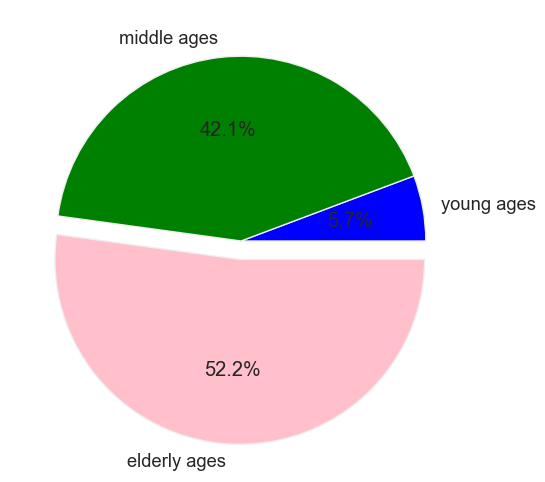

In [17]:
colors = ['blue','green','pink']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')

In [18]:
counts=heart_df['target'].value_counts()

In [19]:
counts

target
1    526
0    499
Name: count, dtype: int64

In [20]:
total=counts[0]+counts[1]

In [21]:
counts_zero=counts[0]/total
counts_zero

0.4868292682926829

In [22]:
counts_one=counts[1]/total
counts_one

0.5131707317073171

In [23]:
print("percentage of patients with diesease is",round(counts_one*100,2))
print("percentage of patiennts with out diesease is",round(counts_zero*100,2))

percentage of patients with diesease is 51.32
percentage of patiennts with out diesease is 48.68


# Analysing the column sex

In [24]:
heart_df['sex'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

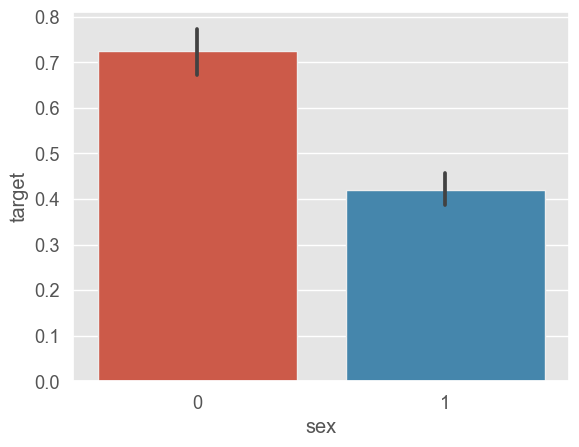

In [25]:
sns.barplot(x=heart_df['sex'],y=heart_df['target'])

# Analysing the column chest pain

In [26]:
heart_df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

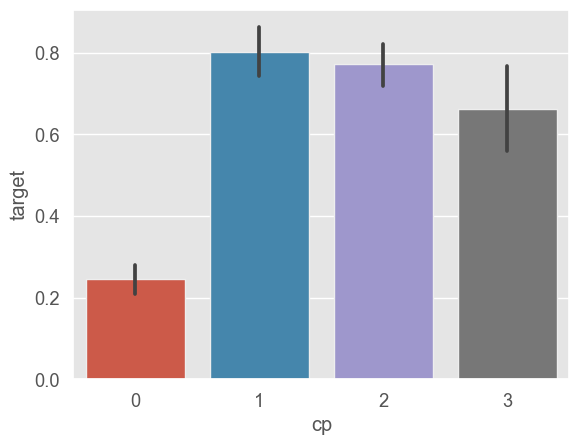

In [27]:
sns.barplot(x=heart_df['cp'],y=heart_df['target'])


# Analysing the column fbs

In [28]:
heart_df['fbs'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

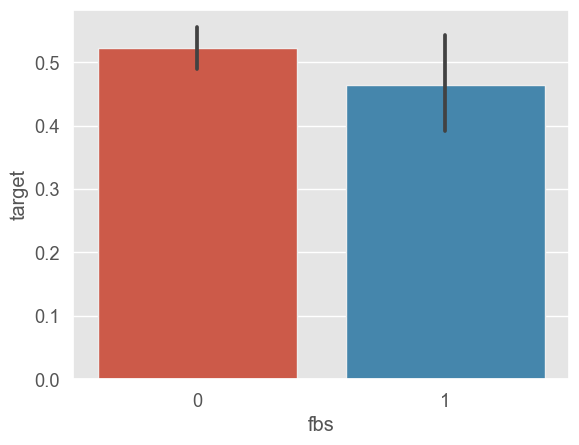

In [29]:
sns.barplot(x=heart_df['fbs'],y=heart_df['target'])

# Analysing the rest ECG

In [30]:
heart_df['restecg'].unique()

array([1, 0, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

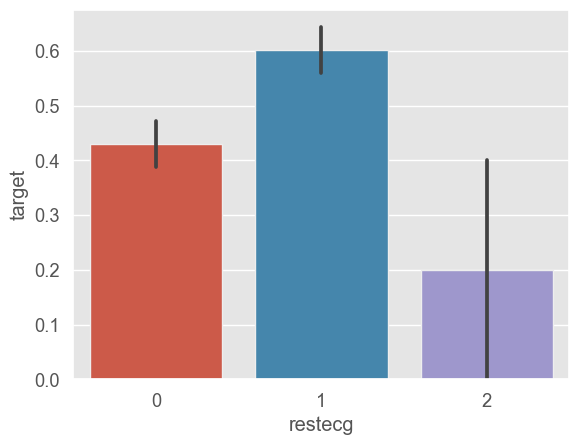

In [31]:
 sns.barplot(x=heart_df['restecg'],y=heart_df['target'])

# Anlysing the column slope

In [32]:
heart_df['slope'].unique()

array([2, 0, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

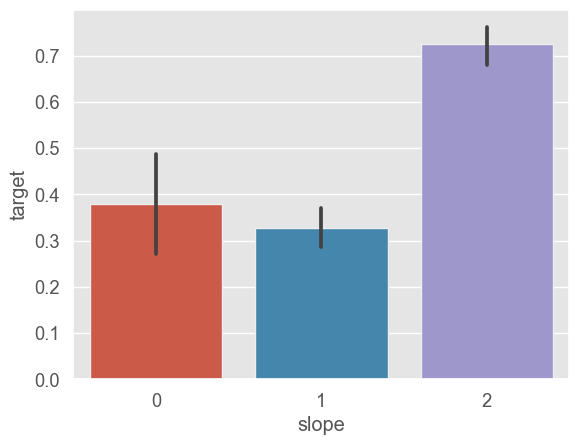

In [33]:
sns.barplot(x=heart_df['slope'],y=heart_df['target'])

# Analysing the column CA

In [34]:
heart_df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='target'>

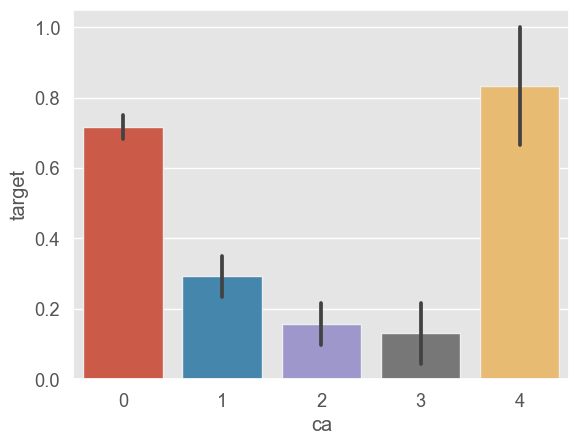

In [35]:
sns.barplot(x=heart_df['ca'],y=heart_df['target'])

<Axes: xlabel='ca', ylabel='count'>

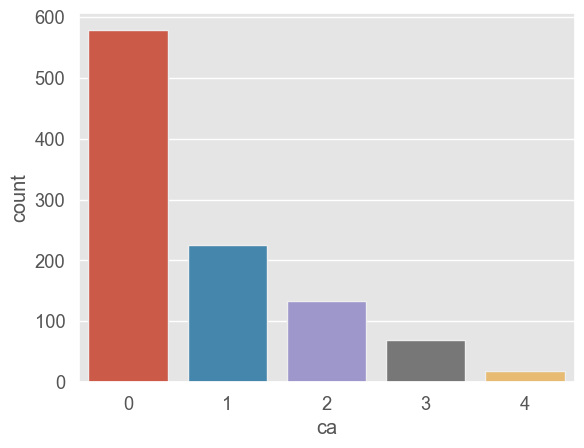

In [36]:
sns.countplot(data=heart_df,x=heart_df['ca'])

# Analysing the Exang column

In [37]:
heart_df['exang'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

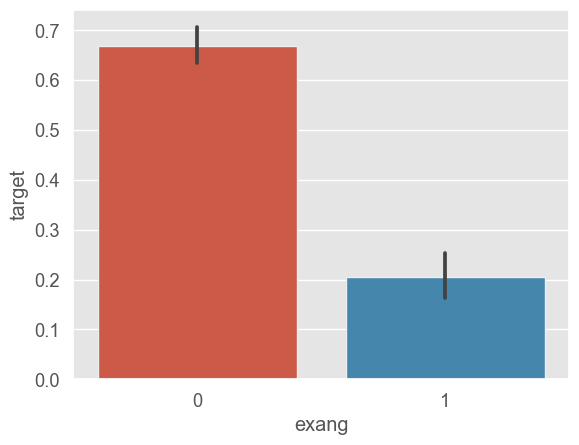

In [38]:
sns.barplot(x=heart_df['exang'],y=heart_df['target'])

# Analysing the thal

In [39]:
heart_df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

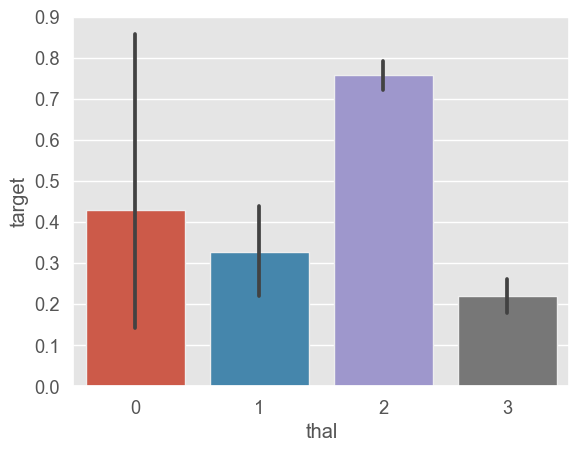

In [40]:
sns.barplot(x=heart_df['thal'],y=heart_df['target'])

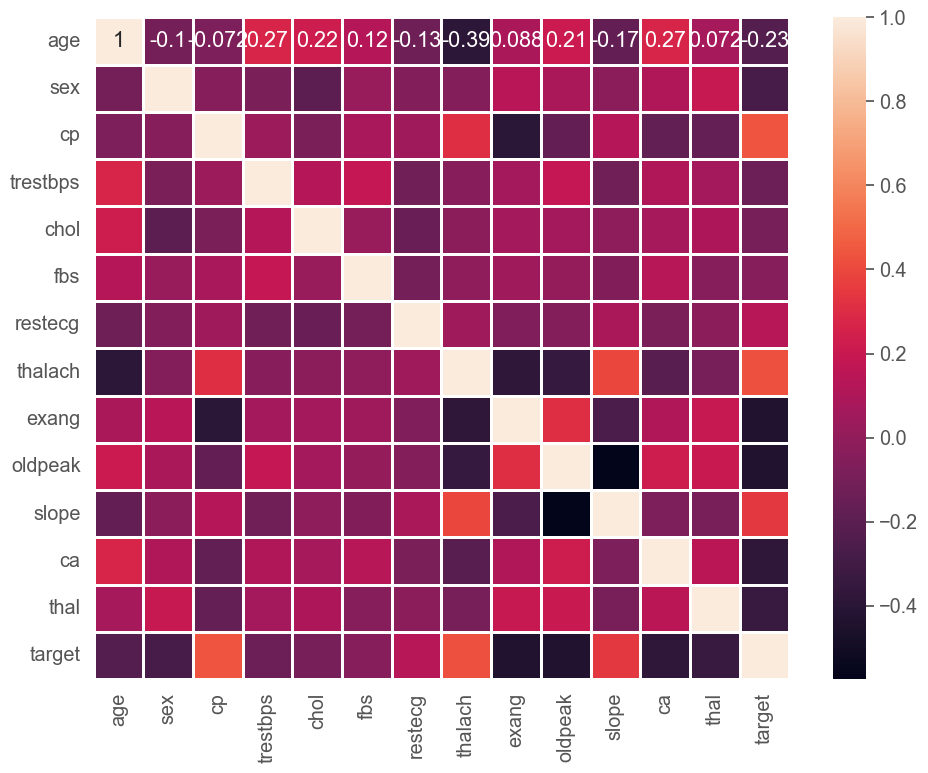

In [41]:
#plotting a heat map
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart_df.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [42]:
#checking the variance
heart_df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [43]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
dtype: float64

In [44]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
a = heart_df.drop(columns=['target'])
b = heart_df['target']

# Feature selection
selector1 = SelectKBest(score_func=chi2, k=13)  # Selecting features
X_selected1 = selector1.fit_transform(a, b)

# Get selected feature indices
selected_feature_indices1 = selector1.get_support(indices=True)

# Get selected feature names
selected_feature_names1 = a.columns[selected_feature_indices1]

# Get selected feature values
selected_feature_values1 = a.iloc[:, selected_feature_indices1]

# Print selected feature names and values
print("Selected Feature Names:", selected_feature_names1)

Selected Feature Names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


# Feature selection

In [46]:
x=heart_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']] 
y=heart_df['target']

# Spliting the data set into train and test

In [47]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 104.2 KB


# Logistic Regression

In [49]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 85.49511854951184 %
Testing accuracy score of the model is: 88.31168831168831 %


In [50]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[121  24]
 [ 12 151]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.83      0.87       145
           1       0.86      0.93      0.89       163

    accuracy                           0.88       308
   macro avg       0.89      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



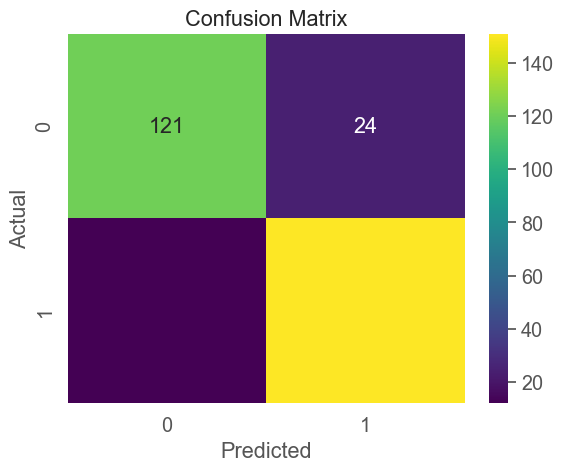

In [51]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# KNearestNeighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 87.86610878661088 %
Testing accuracy score of the model is: 86.03896103896103 %


In [53]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[128  17]
 [ 26 137]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       145
           1       0.89      0.84      0.86       163

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



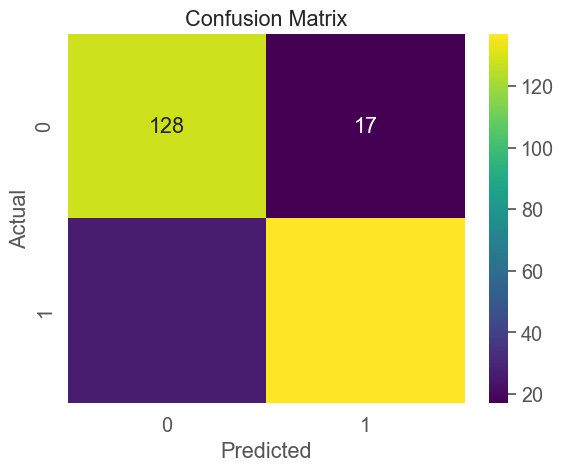

In [54]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred1)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# SVM

In [55]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 71.40864714086472 %
Testing accuracy score of the model is: 71.75324675324676 %


In [56]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[108  37]
 [ 50 113]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.75      0.69      0.72       163

    accuracy                           0.72       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.72      0.72      0.72       308



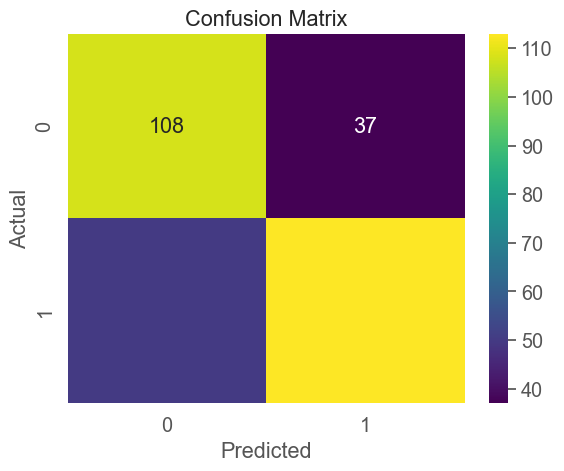

In [57]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred2)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 100.0 %


In [59]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[145   0]
 [  0 163]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [60]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [61]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [63]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 99.02597402597402 %


In [64]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[145   0]
 [  3 160]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [65]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

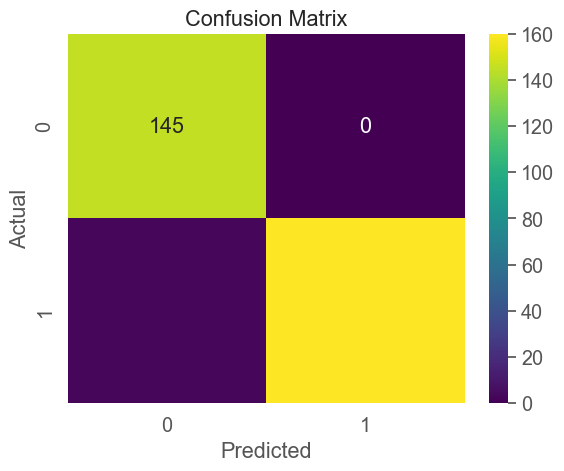

In [66]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred4)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 99.442119944212 %
Testing accuracy score of the model is: 98.7012987012987 %


In [68]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[141   4]
 [  0 163]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.97      0.99       145
           1       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



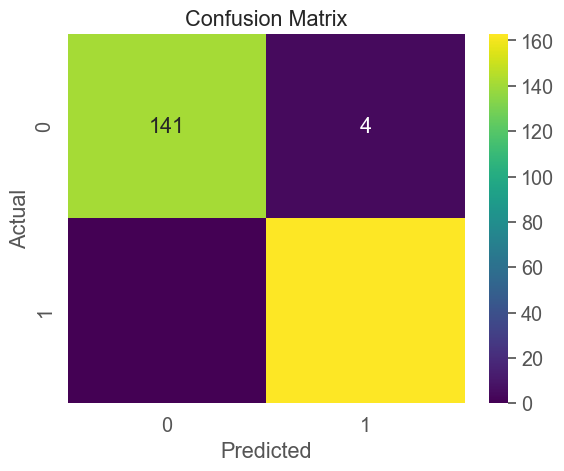

In [69]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred5)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# GradientBoosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss='exponential', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 98.60529986052998 %
Testing accuracy score of the model is: 97.72727272727273 %


In [71]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred6))

print("Classification Report",classification_report(y_test,y_pred6))

Confusion matrix of the model [[140   5]
 [  2 161]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.97      0.99      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



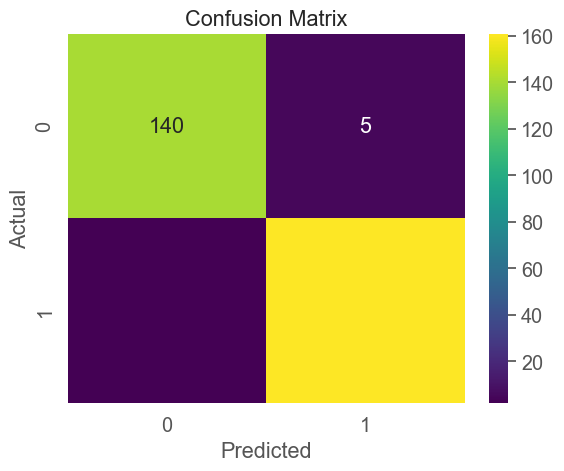

In [72]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred6)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

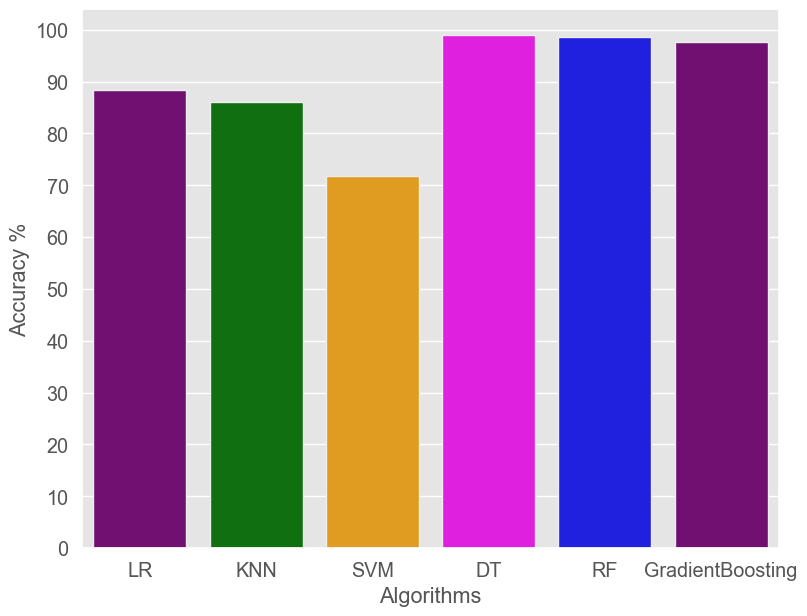

In [73]:
colors = ["purple", "green", "orange", "magenta","blue"]

# sns.set_style("whitegrid")
plt.figure(figsize=(9,7))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [74]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [acc, acc1, acc2, acc4, acc5, acc6]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,0.990260
4,Random Forest,0.987013
5,Gradient Boosting,0.977273
0,Logistic Regression,0.883117
1,KNN,0.860390
2,SVM,0.717532


In [75]:
index_val=np.random.randint(1024, size=1)
print(index_val)

[228]


In [76]:
class_droped_df = x
features= class_droped_df.loc[index_val].to_numpy()
print(features)

[[52.          1.          1.          4.85203026  5.32300998  1.
   1.          5.21493576  0.          0.          2.          0.
   2.        ]]


In [77]:
features_original_val= heart_df.loc[index_val].to_numpy()
print(features_original_val)

[[52.          1.          1.          4.85203026  5.32300998  1.
   1.          5.21493576  0.          0.          2.          0.
   2.          1.        ]]


In [78]:
prediction = dtc2.predict(features)
print("Prediction: {}".format(prediction))
if prediction==[0]:
  print("There are not Suffering from Heart Disease")
else:
  print("There are  Suffering from Heart  Disease")

Prediction: [1]
There are  Suffering from Heart  Disease


In [79]:
import joblib
joblib.dump(rfc,"Heart.pkl")

['Heart.pkl']

In [80]:
m = joblib.load('Heart.pkl')
m.predict([[55,1,3,145,233,0,0,150,0,2.2,0,0,1]])

array([1], dtype=int64)